In [1]:
import pandas as pd
df = pd.read_csv('TCS1.csv')
df2 = df.reset_index()['Close']
df2.shape

(4494,)

In [2]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
4493,2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3161.699951,260949.0


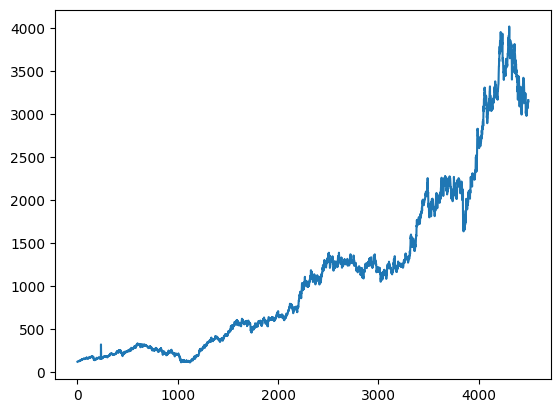

In [3]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [4]:
df2.isnull().sum()

8

In [5]:
df2 = df2.dropna()

In [6]:
df2.isnull().sum()

0

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [9]:
df1.shape

(4486, 1)

In [10]:
## splitting dataset into train and test data
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [13]:
print(X_train)

[[0.00224754 0.00301848 0.00306134 ... 0.01297664 0.01281157 0.01292353]
 [0.00301848 0.00306134 0.00305494 ... 0.01281157 0.01292353 0.01186342]
 [0.00306134 0.00305494 0.0032392  ... 0.01292353 0.01186342 0.01188261]
 ...
 [0.25392826 0.26054357 0.26353132 ... 0.27118308 0.27247544 0.26990352]
 [0.26054357 0.26353132 0.26433104 ... 0.27247544 0.26990352 0.27207877]
 [0.26353132 0.26433104 0.27078003 ... 0.26990352 0.27207877 0.27351187]]


In [14]:
print(X_test.shape), print(Y_test.shape)

(1245, 100)
(1245,)


(None, None)

In [15]:
# reshape input to be [samples, time steps features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [16]:
# Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
48/48 [==============================] - 33s 489ms/step - loss: 0.0035 - val_loss: 8.4730e-04
Epoch 2/100
48/48 [==============================] - 20s 419ms/step - loss: 6.8032e-05 - val_loss: 0.0011
Epoch 3/100
48/48 [==============================] - 20s 415ms/step - loss: 5.7880e-05 - val_loss: 0.0023
Epoch 4/100
48/48 [==============================] - 21s 429ms/step - loss: 5.8715e-05 - val_loss: 0.0023
Epoch 5/100
48/48 [==============================] - 21s 429ms/step - loss: 5.5175e-05 - val_loss: 0.0043
Epoch 6/100
48/48 [==============================] - 21s 441ms/step - loss: 5.4861e-05 - val_loss: 0.0045
Epoch 7/100
48/48 [==============================] - 21s 434ms/step - loss: 5.3868e-05 - val_loss: 0.0039
Epoch 8/100
48/48 [==============================] - 20s 426ms/step - loss: 5.6138e-05 - val_loss: 0.0033
Epoch 9/100
48/48 [==============================] - 20s 416ms/step - loss: 6.2271e-05 - val_loss: 0.0046
Epoch 10/100
48/48 [==========================

48/48 [==============================] - 20s 422ms/step - loss: 1.9750e-05 - val_loss: 0.0015
Epoch 78/100
48/48 [==============================] - 20s 415ms/step - loss: 2.4864e-05 - val_loss: 0.0017
Epoch 79/100
48/48 [==============================] - 20s 417ms/step - loss: 1.6356e-05 - val_loss: 8.6326e-04
Epoch 80/100
48/48 [==============================] - 20s 421ms/step - loss: 1.8946e-05 - val_loss: 0.0011
Epoch 81/100
48/48 [==============================] - 20s 421ms/step - loss: 1.9146e-05 - val_loss: 8.0516e-04
Epoch 82/100
48/48 [==============================] - 19s 410ms/step - loss: 1.5801e-05 - val_loss: 0.0012
Epoch 83/100
48/48 [==============================] - 20s 419ms/step - loss: 1.6406e-05 - val_loss: 9.2533e-04
Epoch 84/100
48/48 [==============================] - 20s 416ms/step - loss: 1.7017e-05 - val_loss: 0.0012
Epoch 85/100
48/48 [==============================] - 21s 431ms/step - loss: 1.4882e-05 - val_loss: 0.0016
Epoch 86/100
48/48 [==================

In [20]:
# perform prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

39/39 [==============================] - 2s 61ms/step


In [21]:
# Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [22]:
### Calculate the MSE performance metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_train, train_predict))

560225.1461894115


In [23]:
### Test Data MSE
mean_squared_error(Y_test, test_predict)

6252255.6074536415

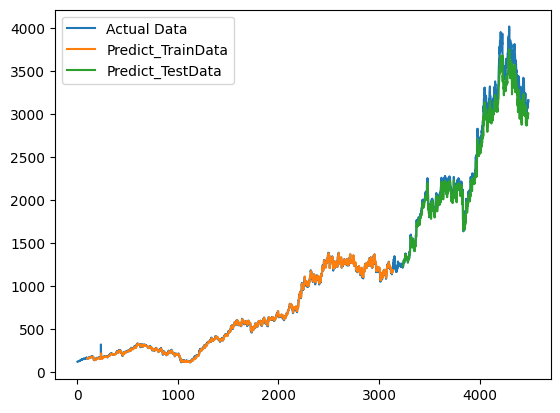

In [30]:
### Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Actual Data", "Predict_TrainData", "Predict_TestData"])
plt.show()